* [Учебник по NumPy](https://pythonworld.ru/numpy/1.html)
* [Ускоренный курс по Pandas](https://teletype.in/@python_academy/YzdI5z1NUP)

# Разведочный анализ данных (РАД) | Exploratory Data Analysis (EDA)
Разработан в лаборатории Bell Labs Джоном Тьюки (John Tukey), математиком и статистиком, в конце 1970-ых гг. В одной из своих работ сказал: " Единственный шанс людей сделать что-то **лучше**, чем компьютеры, - это попытаться сделать **меньше**, чем они".
1. **IDA - Initial Data Analysis** позволяет:
  * завершить наблюдения или отметить пропущенные случаи с помощью соответствующих признаков;
  * преобразовать текстовые или категориальные признаки;
  * создавать новые признаки, основываясь на знании предметной области данных;
  * получать числовой набор данных, где строки - это наблюдения, а столбцы - признаки (*датафрейм* - фрейм данных).
2. **EDA - Exploratory Data Analysis** позволяет:
  * описать данные;
  * внимательно изучить их распределение;
  * понять отношения между признаками;
  * обратить внимание на неожиданные значения;
  * группировать данные и проводить анализ по группам (обратить внимание на неожиданные значения по группам, на различия в группах).  
**Найти и собрать данные**  
"Data wrangling" занимает бОльшую часть времени работы с большими даными.
- Полезно проверять очевидные вещи. Из-за объёмов, переделывать обработку несколько раз будет особенно неэффективно
- Полезно знать инструменты командной строки для быстрых, одноразовых операций не требовательных к правильности формата данных

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(pd.__version__)
print(np.__version__)

1.3.5
1.21.6


In [ ]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target, dtype = np.str)
iris_df['group'] = pd.Series([iris.target_names[k] for k in iris.target], dtype='category')
iris_df

<ipython-input-3-71c28dc63d95>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  iris_df['target'] = pd.Series(iris.target, dtype = np.str)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


sepal = чашелистик  
petal = лепесток  
![](https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png)

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   group              150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


Text(0, 0.5, 'sepal width (cm)')

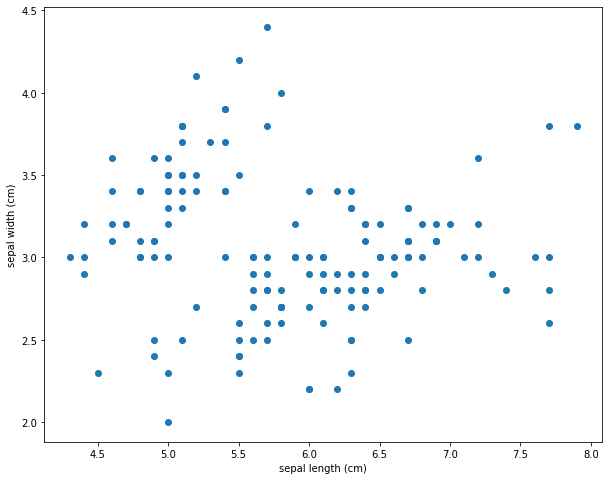

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

## Измерение [центральной тенденции](https://ru.wikipedia.org/wiki/Меры_центральной_тенденции#:~:text=Мера%20центральной%20тенденции%20в%20статистике,меры%20всегда%20остается%20за%20исследователем)

In [ ]:
iris_df.mean(numeric_only=True)

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [ ]:
iris_df.median(numeric_only=True)

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64

* Медиана лепестка сильно отличается от средней -> требует дальнейшего изучения

## Измерение дисперсии и диапазона
**Дисперсия**: среднеквадратичное отклонение значений от среднего арифметического, показывающее разброс данных относительно него.  
**Стандартное отклонение**: стандартный разброс между каждым отдельным значением и средним арифметическим, квадратный корень из дисперсии.

In [ ]:
iris_df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [ ]:
iris_df.max(numeric_only=True) - iris_df.min(numeric_only=True)

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
dtype: float64

## Работа с квартилями/квантилями/процентилями
**"99%-ый квантиль равен 3 cm", если в 99% случаев длина <u>не превышала</u> 3 cm**

0 квартиль = 0 квантиль = 0 процентиль (0%)

1 квартиль = 0,25 квантиль = 25 процентиль (25%)

2 квартиль = .5 квантиль = 50 процентиль (медиана) (50%)

3 квартиль = .75 квантиль = 75 процентиль (75%)

4 квартиля = 1 квантиль = 100 процентиль (100%)

In [ ]:
iris_df.quantile([0, .25, .5, .75, 1])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


Разница между верхним и нижнем процентилем составляет **интерквартильный диапазон (IQR)**.  Обратите внимание на предыдущую таблицу, где мы измеряли диапазон.  
То, что лежит между нижним квартилем и минимумом, а также верхним квартилем и максимумом, является исключительно редкими значениями, которые могут отрицательно повлиять на результаты анализа. Такие редкие случаи называются **выбросами** и с ними предстоит отдельная работа.

## Одной командой

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Определение мер нормальности
* **Асимметрия (*skewness*)** определяет смещение данных относительно среднего значения. Если перекос *отрицательный, то левый хвост слишком длинный и масса наблюдений находится на правой стороне распределения*. Если он положительный - всё наоборот.
* **Эксцесс (*kurtosis*)** показывает, имеет ли распределение данных пик и хвосты правильной формы. Если эксцесс выше нуля, то распределение имеет выраженный пик. Если ниже нуля - распределение будет довольно плоским.

**Нормальное (или Гауссовое) распределение** является наиболее полезным распределением в статистике благодаря его распространенности и особым математическим свойствам. Это основа многих статистических тестов и моделей.  
В нём <u>среднее значение и медиана имеют одинаковые значения, значения симметрично распределены вокруг среднего (имеет форму колокола), а стандартное отклонение указывает расстояние от среднего значения, где кривая распределения изменяется от вогнутой к выпуклой (точка перегиба)</u>.  
В реальных данных нормальное распределение встречается редко.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Standard_deviation_diagram_%28decimal_comma%29.svg/325px-Standard_deviation_diagram_%28decimal_comma%29.svg.png)

In [ ]:
from scipy.stats import skew, skewtest
from scipy.stats import kurtosis, kurtosistest

In [ ]:
s = skew(iris_df['petal length (cm)'])
zscore, pvalue = skewtest(iris_df['petal length (cm)'])
print(f'skewness = {s}, z-score = {zscore}, p-value = {pvalue}')

skewness = -0.2721276664567214, z-score = -1.3998796028252125, p-value = 0.16154937503384703


In [ ]:
k = kurtosis(iris_df['petal length (cm)'])
zscore, pvalue = kurtosistest(iris_df['petal length (cm)'])
print(f'kurtosis = {k}, z-score = {zscore}, p-value = {pvalue}')

kurtosis = -1.3955358863990055, z-score = -14.823212578703975, p-value = 1.0370372230865836e-49


Результаты говорят о том, что данные немного смещены влево, но не настолько, что данные можно было бы считать неприменимыми. Кривая слишком плоская, что требует дальнейшего изучения.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64969062d0>,
      dtype=object)

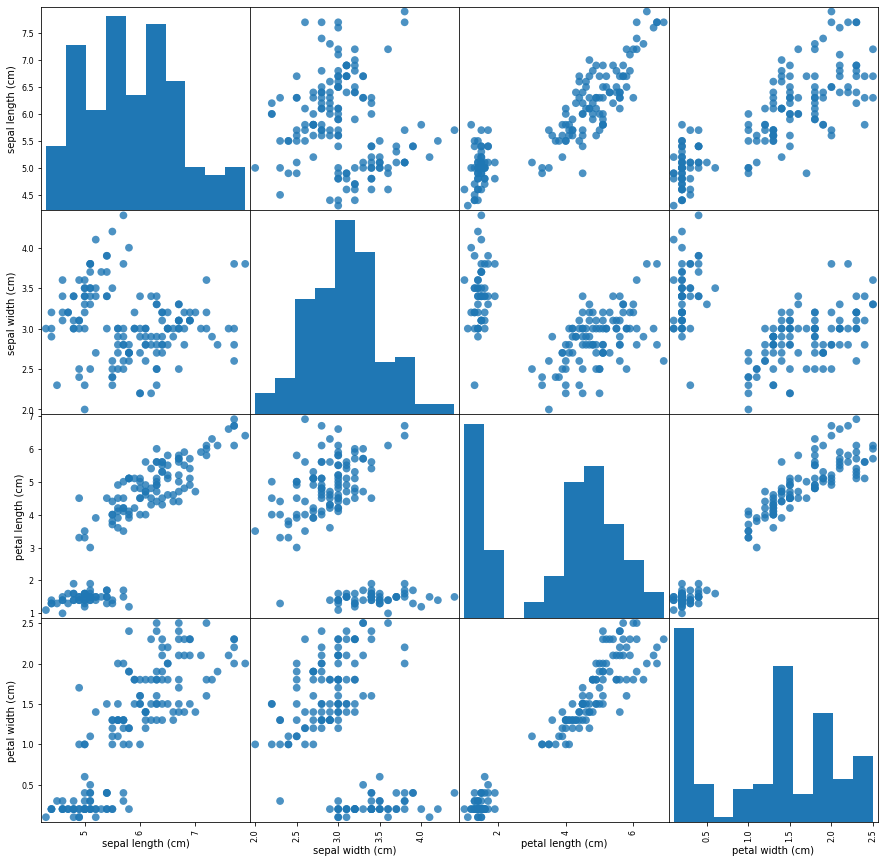

In [ ]:
pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker = 'o', s = 60, alpha = 0.8)

## Группировка

In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].mean()

,petal length (cm),petal width (cm)
group,,
setosa,1.462,0.246
versicolor,4.260,1.326
virginica,5.552,2.026


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].sum()

,petal length (cm),petal width (cm)
group,,
setosa,73.1,12.3
versicolor,213.0,66.3
virginica,277.6,101.3


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].var() # дисперсия

,petal length (cm),petal width (cm)
group,,
setosa,0.030159,0.011106
versicolor,0.220816,0.039106
virginica,0.304588,0.075433


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].max()

,petal length (cm),petal width (cm)
group,,
setosa,1.9,0.6
versicolor,5.1,1.8
virginica,6.9,2.5


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].min()

,petal length (cm),petal width (cm)
group,,
setosa,1.0,0.1
versicolor,3.0,1.0
virginica,4.5,1.4


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].median()

,petal length (cm),petal width (cm)
group,,
setosa,1.50,0.2
versicolor,4.35,1.3
virginica,5.55,2.0


In [ ]:
iris_df.groupby('group')[['petal length (cm)', 'petal width (cm)']].std()

,petal length (cm),petal width (cm)
group,,
setosa,0.173664,0.105386
versicolor,0.469911,0.197753
virginica,0.551895,0.274650


## Сводная таблица
Сводные таблицы — это мощный инструмент, который позволяет оперативно составлять отчеты из тысячи, сотни тысяч и даже миллионов строк.

Данные динамически упорядочиваются, классифицируются и суммируются в табличном формате.

С помощью сводных таблиц можно моментально изменять способ анализа:
* путем быстрого перемещения и изменения полей с данными
* применением различных фильтров
* группировкой данных и построением новых метрик расчета

Работа с этими таблицами интуитивно понятна.

```python
DataFrame.pivot_table(
  values=None,
  index=None,
  columns=None,
  aggfunc='mean',
  fill_value=None,
  margins=False,
  dropna=True
)
```
___
[Pandas Pivot table](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table)
___

In [ ]:
 iris_df.pivot_table('petal length (cm)', index='group', columns='petal width (cm)')

petal width (cm),0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
group,,,,,,,,,,,,,,,,,,,,,,
setosa,1.38,1.444828,1.428571,1.571429,1.7,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
versicolor,NaN,NaN,NaN,NaN,NaN,NaN,3.628571,3.566667,4.24,4.176923,4.5,4.58,4.766667,5.0,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
virginica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.6,5.05,5.800000,4.5,5.381818,5.32,5.55,5.783333,6.033333,5.7,5.433333,5.933333


## Частоты

In [ ]:
iris_df['group'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: group, dtype: int64

In [ ]:
iris_df['petal length (cm)'].value_counts()

1.5    13
1.4    13
5.1     8
4.5     8
1.3     7
1.6     7
5.6     6
4.0     5
4.9     5
4.7     5
4.8     4
1.7     4
4.4     4
4.2     4
5.0     4
4.1     3
5.5     3
4.6     3
6.1     3
5.7     3
3.9     3
5.8     3
1.2     2
1.9     2
6.7     2
3.5     2
5.9     2
6.0     2
5.4     2
5.3     2
3.3     2
4.3     2
5.2     2
6.3     1
1.1     1
6.4     1
3.6     1
3.7     1
3.0     1
3.8     1
6.6     1
6.9     1
1.0     1
Name: petal length (cm), dtype: int64

## Диаграммы размаха (*boxplot*)
![](https://thumb.tildacdn.com/tild6238-6333-4565-a133-383861366131/-/resize/760x/-/format/webp/image.png)

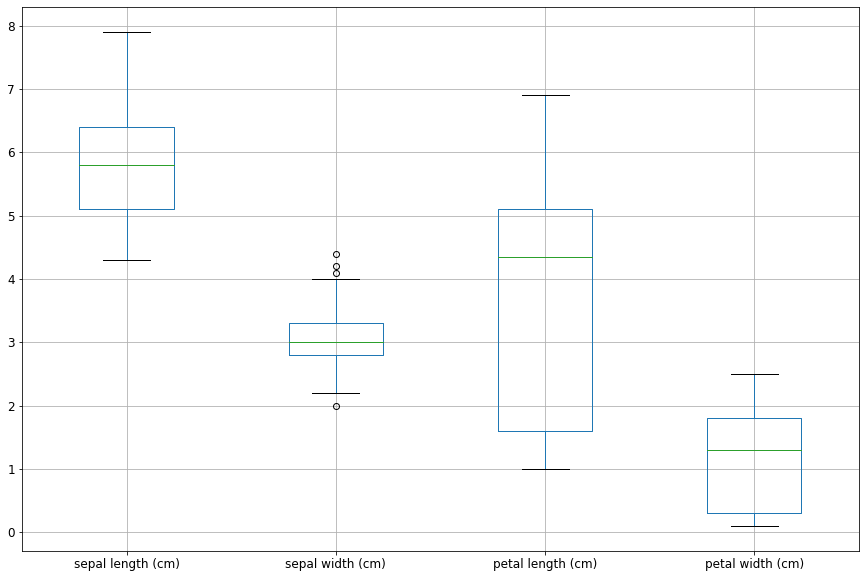

In [ ]:
iris_df.boxplot(fontsize=12, figsize=(15, 10))

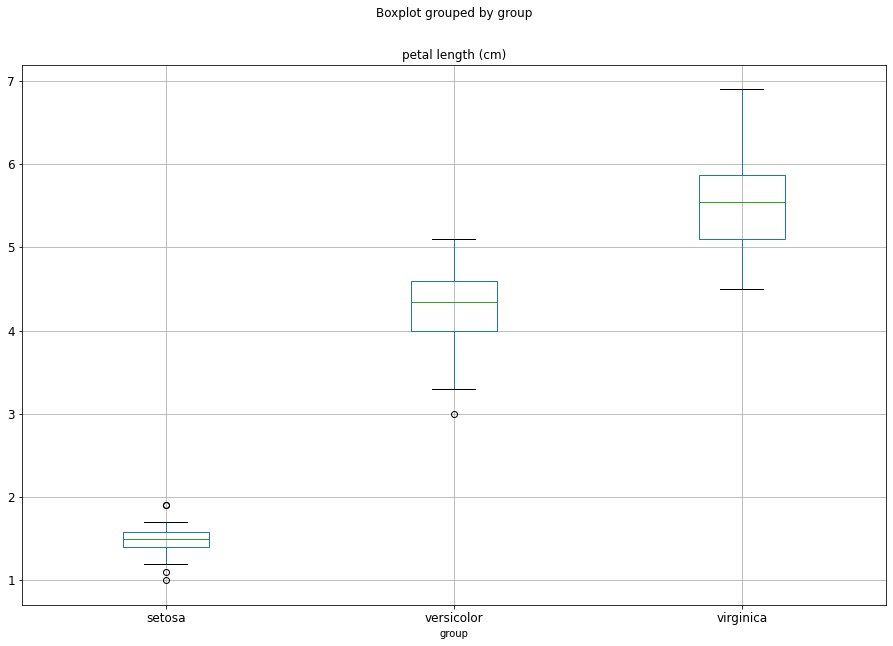

In [ ]:
iris_df.boxplot(column='petal length (cm)', by='group', fontsize=12, figsize=(15, 10))

## Распределения

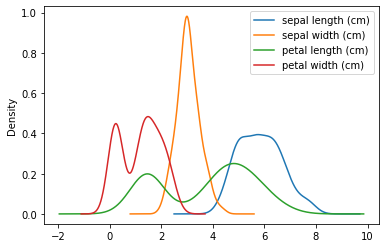

In [ ]:
columns = iris_df.columns[:4]
density_plot = iris_df[columns].plot(kind='density')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64968ad750>,
      dtype=object)

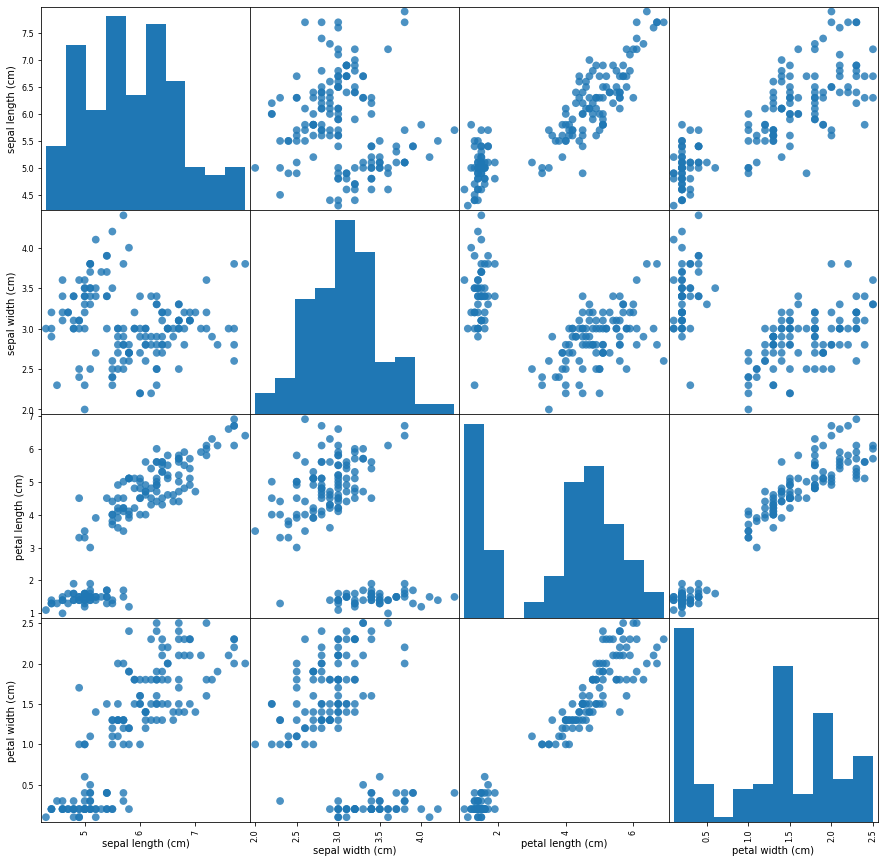

In [ ]:
pd.plotting.scatter_matrix(iris_df, figsize=(15,15), marker = 'o', s = 60, alpha = 0.8)

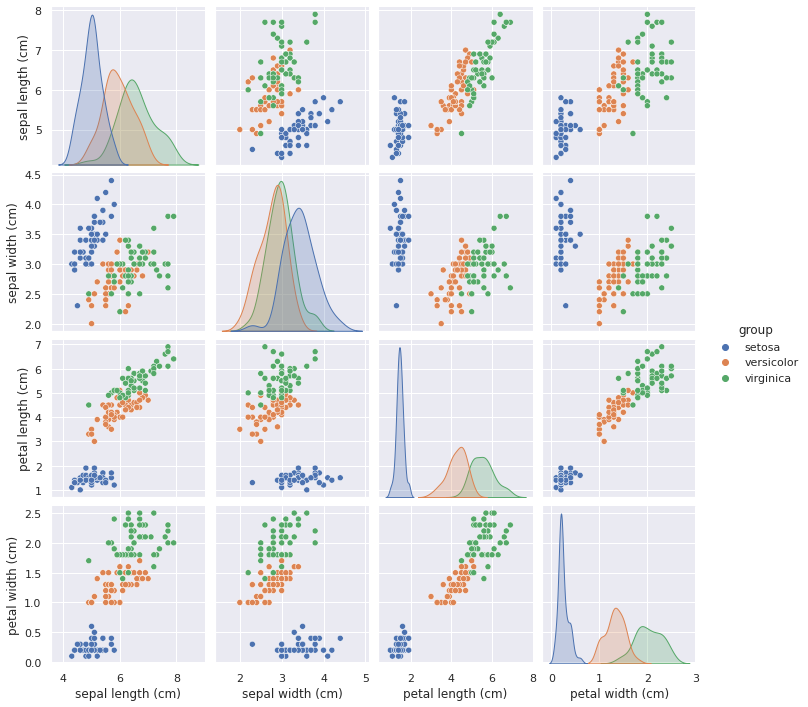

In [ ]:
import seaborn as sns; sns.set()

sns.pairplot(iris_df[iris_df.columns], hue='group')

## Корреляция
___Корреляция___ - это величина, которая показывает, насколько похоже 2 ряда себя ведут: убывают и возрастают они одновременно (=1) или в противофазе (=-1)  
![](https://drive.google.com/uc?export=view&id=1VCjC2CcqUSmj3GFn8ibybdJ0cOPT6nfS)
![](https://drive.google.com/uc?export=view&id=1QehF56M3d58DAKz7FdHRNhmxLobG-lte)

In [ ]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'group'],
      dtype='object')

In [ ]:
round(iris_df[iris_df.columns].corr(), 3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000,-0.118,0.872,0.818
sepal width (cm),-0.118,1.000,-0.428,-0.366
petal length (cm),0.872,-0.428,1.000,0.963
petal width (cm),0.818,-0.366,0.963,1.000


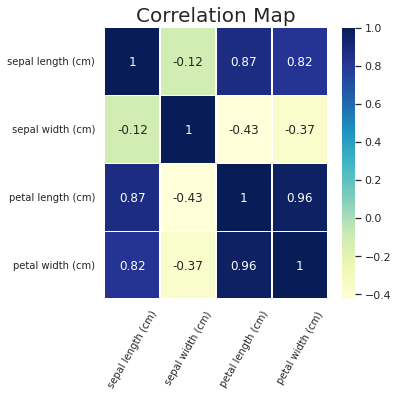

In [ ]:
import seaborn as sns; sns.set()

def correlated_map(dataframe, plot=False):
    corr = dataframe.corr()
    if plot:
        sns.set(rc={'figure.figsize': (5, 5)})
        sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=.7)  # тепловая карта коррелляций
        plt.xticks(rotation=60, size=10)
        plt.yticks(size=10)
        plt.title('Correlation Map', size=20)
        plt.show()

correlated_map(iris_df[iris_df.columns], plot=True)

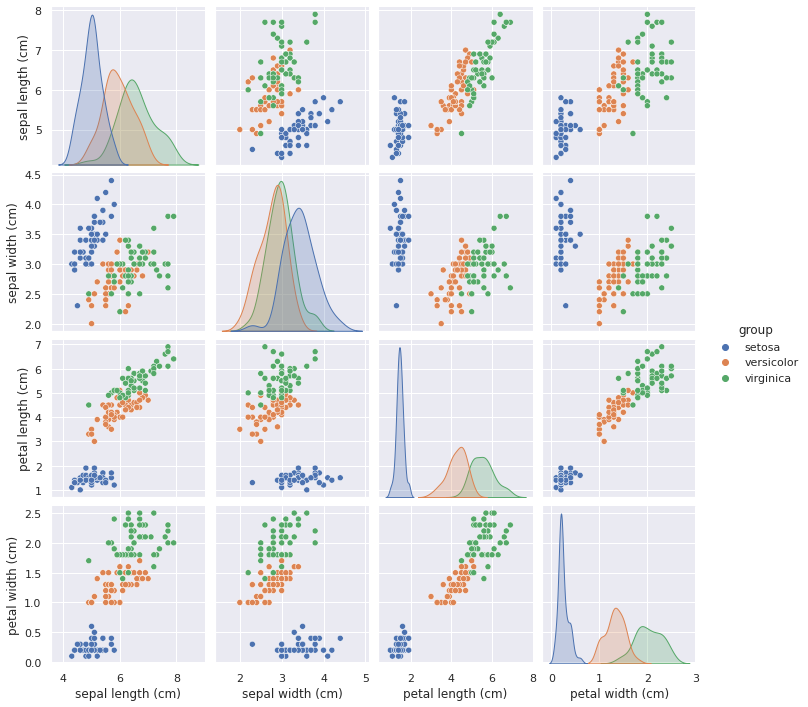

In [ ]:
import seaborn as sns; sns.set()

sns.pairplot(iris_df[iris_df.columns], hue='group')

## Работа с выбросами

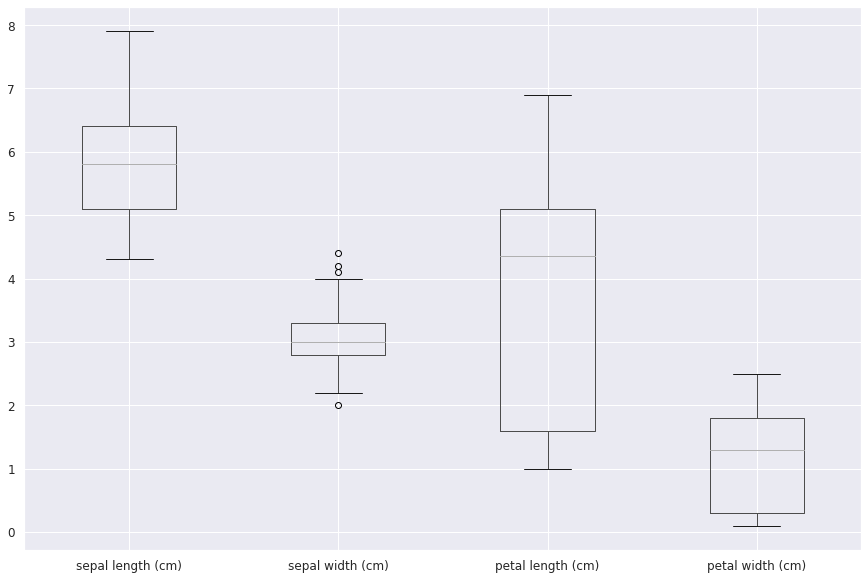

In [ ]:
iris_df.boxplot(fontsize=12, figsize=(15, 10))

### Метод стандартных отклонений

In [ ]:
# считаем статистику
sepal_width_mean, sepal_width_std = iris_df['sepal width (cm)'].mean(), iris_df['sepal width (cm)'].std()

# определяем выбросы
cut_off = sepal_width_std * 3
lower = sepal_width_mean - cut_off
upper = sepal_width_mean + cut_off

# показываем выбросы
outliers = iris_df.loc[(iris_df['sepal width (cm)'] < lower) | (iris_df['sepal width (cm)'] > upper)]
print('Обнаруженные выбросы:')
outliers

Обнаруженные выбросы:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
15,5.7,4.4,1.5,0.4,0,setosa


In [ ]:
# удаляем выбросы
outliers_removed = iris_df.loc[(iris_df['sepal width (cm)'] >= lower) & (iris_df['sepal width (cm)'] <= upper)]
print('Non-outlier observations:')
outliers_removed

Non-outlier observations:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


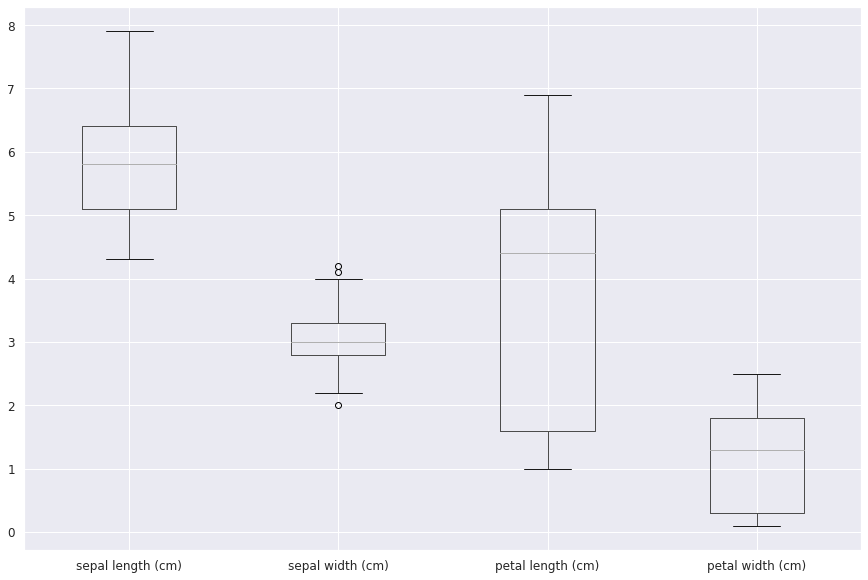

In [ ]:
outliers_removed.boxplot(fontsize=12, figsize=(15, 10))

### Межквартильный метод
IQR рассчитывается как разница между 75-м и 25-м процентилями данных.

IQR определяет средние 50% данных, или тело данных.

In [ ]:
# считаем интерквартильный размах
q25, q75 = iris_df['sepal width (cm)'].quantile(0.25), iris_df['sepal width (cm)'].quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))

Percentiles: 25th = 2.800, 75th = 3.300, IQR = 0.500


Один из популярных методов: объявить наблюдение выбросом, [если его значение в 1,5 раза больше, чем IQR, или в 1,5 раза меньше, чем IQR](https://www.codecamp.ru/blog/find-outliers-with-iqr/).

In [ ]:
# определяем выбросы
cut_off = iqr * 1.5
lower = q25 - cut_off
upper = q75 + cut_off

# показываем выбросы
outliers = iris_df.loc[(iris_df['sepal width (cm)'] < lower) | (iris_df['sepal width (cm)'] > upper)]
print('Обнаруженные выбросы:')
outliers

Обнаруженные выбросы:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
15,5.7,4.4,1.5,0.4,0,setosa
32,5.2,4.1,1.5,0.1,0,setosa
33,5.5,4.2,1.4,0.2,0,setosa
60,5.0,2.0,3.5,1.0,1,versicolor


In [ ]:
# удаляем выбросы
outliers_removed = iris_df.loc[(iris_df['sepal width (cm)'] >= lower) & (iris_df['sepal width (cm)'] <= upper)]
print('Non-outlier observations:')
outliers_removed

Non-outlier observations:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,group
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


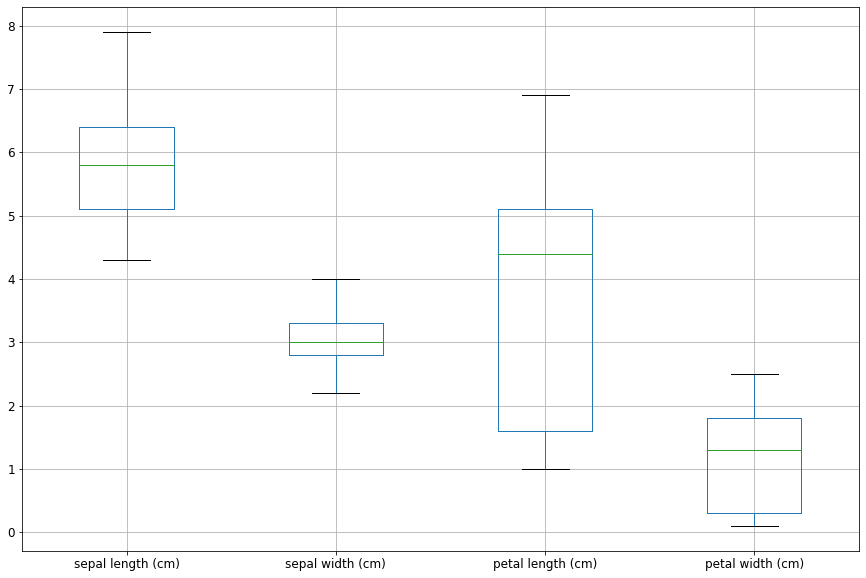

In [ ]:
outliers_removed.boxplot(fontsize=12, figsize=(15, 10))

## [StandartScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
Стандартизация признаков за счет удаления среднего значения и масштабирования до единичной дисперсии.

Стандартное значение признака $x$ рассчитывается как:

$$ z = (x - u) / c $$

где
* $u$ — среднее значение обучающей выборки или ноль, если ```with_mean=False```,
* $s$ — стандартное отклонение обучающей выборки или единица, если ```with_std=False```.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(outliers_removed.iloc[:, :4])

StandardScaler()

In [ ]:
iris_scaled = ss.transform(outliers_removed.iloc[:, :4])
iris_scaled

array([[-0.9105154 ,  1.15915054, -1.37376391, -1.34852508],
       [-1.15112218, -0.10192233, -1.37376391, -1.34852508],
       [-1.39172896,  0.40250682, -1.43084118, -1.34852508],
       [-1.51203236,  0.15029225, -1.31668664, -1.34852508],
       [-1.03081879,  1.41136512, -1.37376391, -1.34852508],
       [-0.54960522,  2.16800884, -1.20253209, -1.08425037],
       [-1.51203236,  0.90693597, -1.37376391, -1.21638772],
       [-1.03081879,  0.90693597, -1.31668664, -1.34852508],
       [-1.75263914, -0.3541369 , -1.37376391, -1.34852508],
       [-1.15112218,  0.15029225, -1.31668664, -1.48066244],
       [-0.54960522,  1.66357969, -1.31668664, -1.34852508],
       [-1.27142557,  0.90693597, -1.25960937, -1.34852508],
       [-1.27142557, -0.10192233, -1.37376391, -1.48066244],
       [-1.87294253, -0.10192233, -1.54499572, -1.48066244],
       [-0.06839165,  2.42022341, -1.48791845, -1.34852508],
       [-0.54960522,  2.16800884, -1.43084118, -1.08425037],
       [-0.9105154 ,  1.

In [ ]:
iris_df__scaled = pd.DataFrame(iris_scaled, columns=iris_df.columns[:4])
iris_df__scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.910515,1.159151,-1.373764,-1.348525
1,-1.151122,-0.101922,-1.373764,-1.348525
2,-1.391729,0.402507,-1.430841,-1.348525
3,-1.512032,0.150292,-1.316687,-1.348525
4,-1.030819,1.411365,-1.373764,-1.348525
...,...,...,...,...
141,1.014339,-0.101922,0.795172,1.426359
142,0.533125,-1.362995,0.681018,0.897810
143,0.773732,-0.101922,0.795172,1.029947
144,0.412822,0.906936,0.909327,1.426359


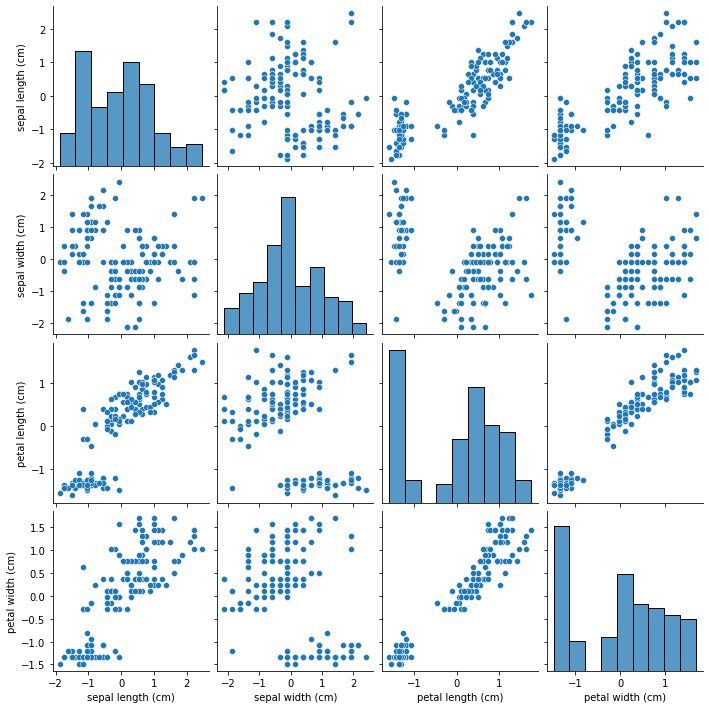

In [ ]:
import seaborn as sns
sns.pairplot(iris_df__scaled)

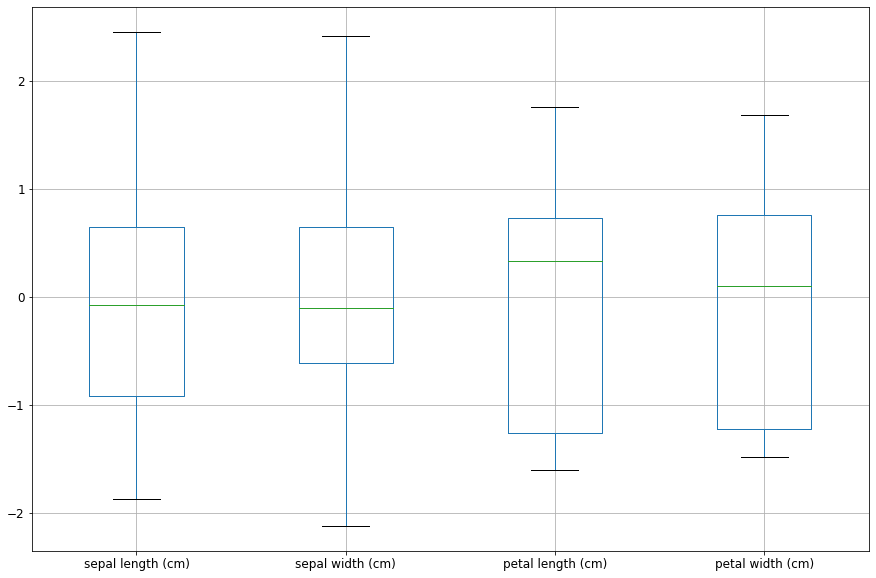

In [ ]:
iris_df__scaled.boxplot(fontsize=12, figsize=(15, 10))

### pandas-profiling
https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 21.9 MB/s 
     |████████████████████████████████| 675 kB 36.2 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 4.7 MB 40.2 MB/s 
     |████████████████████████████████| 812 kB 32.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.7 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=45e88cb25e5e9189932fb860f9ebb623979b9462ca1e3387c5cb13c4afad156d
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295206 sha256=cafd862ca11979eea84abffa283cb443e8362c96de4880b8dc7dac82c0577285
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalli

In [ ]:
!pip install pandas==1.2.5

     |████████████████████████████████| 9.9 MB 24.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(iris_df)

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание
___
1. Самостоятельно изучить блокнот "Weather.ipynb"
2. Провести IDA и EDA на данных ```data/France_weather_data.csv```
3. Нормализовать значения признаков с помощью [двух не рассмотренных классов SciKit-Learn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)